In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('/content/output.csv')
df.head()

,GHO (CODE),GHO (DISPLAY),year,country,dimension,value,processed_text,gho_category
0,#indicator+code,#indicator+name,#date+year,#country+name,#dimension+name,#numeric,['indicatorname'],other
1,PHE_HHAIR_POP_CATEGORY_FUELS,Population with primary reliance on fuels and ...,2024,Sudan,Urban,0.0543,"['population', 'primary', 'reliance', 'fuels',...",other
2,NCD_PAA,Prevalence of insufficient physical activity a...,2024,Sudan,Female,26.649185,"['prevalence', 'insufficient', 'physical', 'ac...",prevalence
3,LIFE_0000000033,nLx - person-years lived between ages x and x+n,2023,Sudan,Both sexes,451194.0274,"['nlx', 'personyears', 'lived', 'ages', 'x', '...",other
4,TB_c_newinc,Tuberculosis - new and relapse cases,2023,Sudan,NaN,27562,"['tuberculosis', 'new', 'relapse', 'cases']",other


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18302 entries, 0 to 18301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GHO (CODE)      18302 non-null  object
 1   GHO (DISPLAY)   18302 non-null  object
 2   year            18302 non-null  object
 3   country         18302 non-null  object
 4   dimension       14864 non-null  object
 5   value           18302 non-null  object
 6   processed_text  18302 non-null  object
 7   gho_category    18302 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [4]:
df.describe()

,GHO (CODE),GHO (DISPLAY),year,country,dimension,value,processed_text,gho_category
count,18302,18302,18302,18302,14864,18302,18302,18302
unique,759,759,73,2,283,12313,753,6
top,MORT_100,Number of deaths,2010,Sudan,Both sexes,0,"['number', 'deaths']",other
freq,989,989,1335,18301,3881,2530,989,8096


In [6]:
df['year']=pd.to_numeric(df['year'],errors='coerce')

In [7]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [8]:
df.isnull().sum()

,0
GHO (CODE),0
GHO (DISPLAY),0
year,1
country,0
dimension,3438
value,1
processed_text,0
gho_category,0


In [9]:
df=df.dropna(subset=['value'])

In [10]:
df['dimension']=df['dimension'].fillna('unknown')

In [11]:
df.describe()

,year,value
count,18301.000000,1.830100e+04
mean,2007.735861,9.220587e+04
std,10.675024,8.082401e+05
min,1953.000000,0.000000e+00
25%,2003.000000,3.500000e-01
50%,2010.000000,1.300000e+01
75%,2015.000000,1.520000e+02
max,2024.000000,3.206455e+07


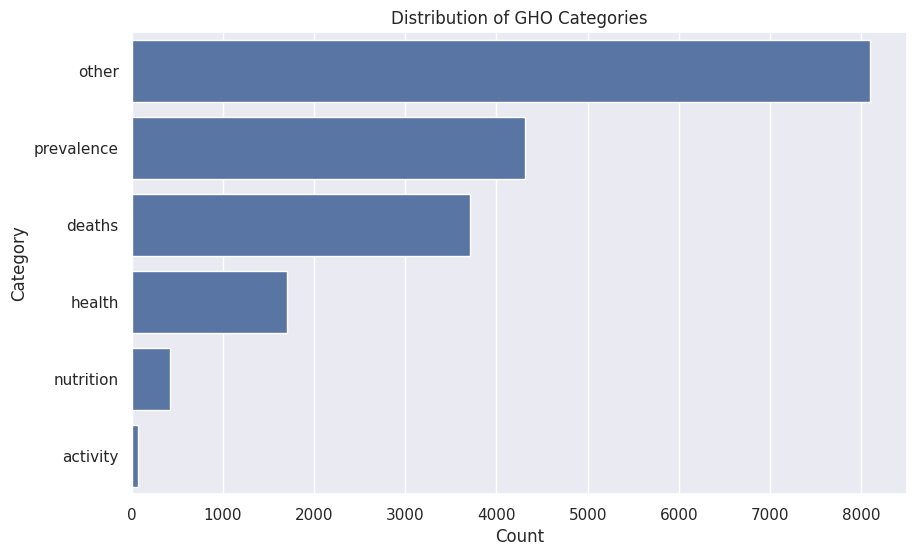

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='gho_category', data=df, order=df['gho_category'].value_counts().index)
plt.title("Distribution of GHO Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

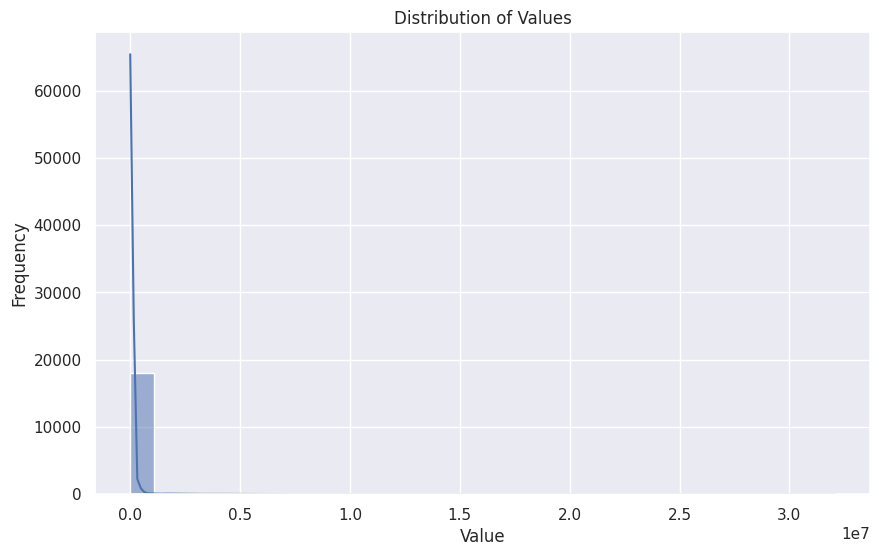

In [13]:
# Distribution of 'value'
plt.figure(figsize=(10, 6))
sns.histplot(df['value'], bins=30, kde=True)
plt.title("Distribution of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

<ipython-input-14-79c01f900fa2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='value', hue='gho_category', estimator='mean', ci=None)


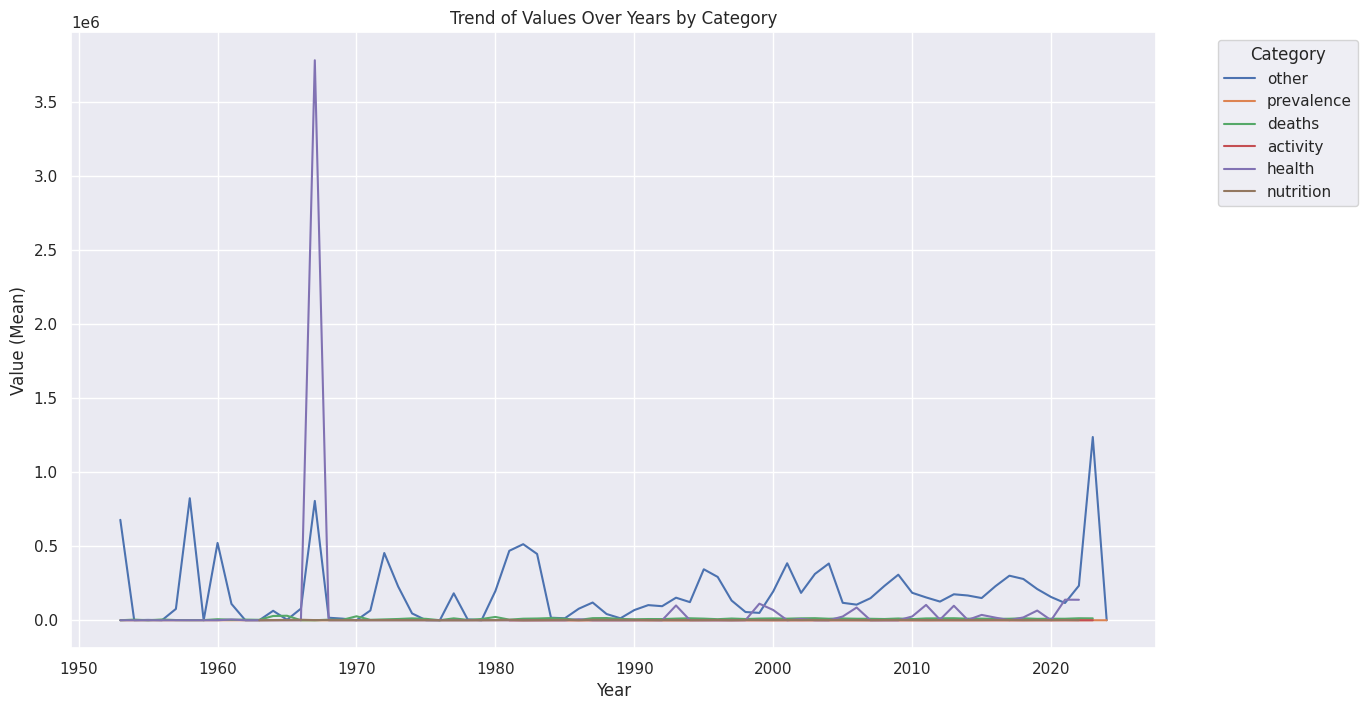

In [14]:
# Trend Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year', y='value', hue='gho_category', estimator='mean', ci=None)
plt.title("Trend of Values Over Years by Category")
plt.xlabel("Year")
plt.ylabel("Value (Mean)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

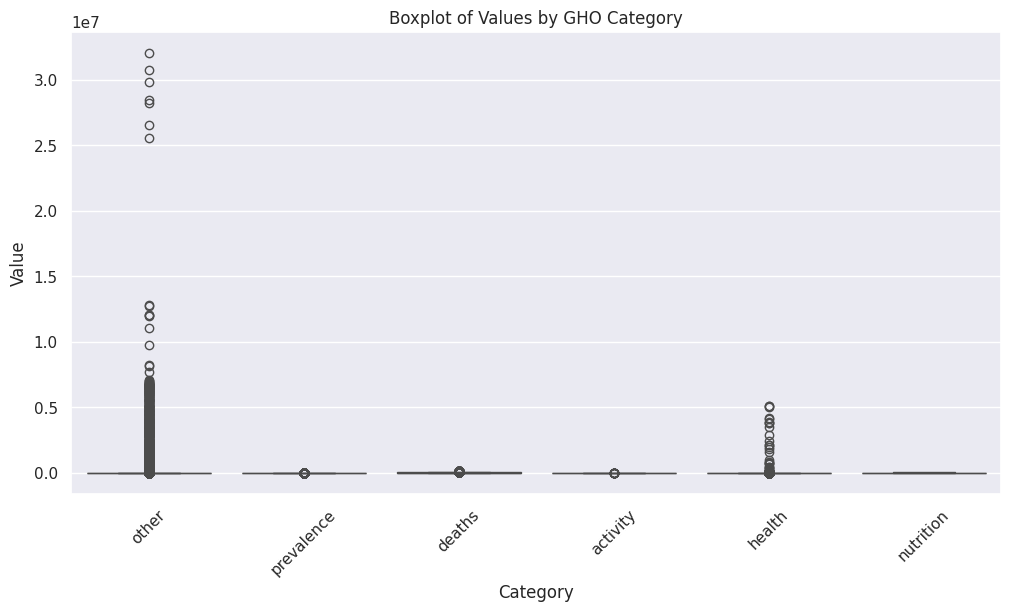

In [15]:
# Boxplot of Values by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='gho_category', y='value', data=df)
plt.title("Boxplot of Values by GHO Category")
plt.xlabel("Category")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Filter the data for 'health' and 'deaths' categories
df1 = df[df['gho_category'].isin(['health', 'deaths'])]

In [17]:
df1.isnull().sum()

,0
GHO (CODE),0
GHO (DISPLAY),0
year,0
country,0
dimension,0
value,0
processed_text,0
gho_category,0


In [18]:
df1.describe()

,year,value
count,5409.000000,5.409000e+03
mean,2007.800518,1.836438e+04
std,10.595873,1.938010e+05
min,1953.000000,0.000000e+00
25%,2003.000000,2.273000e-02
50%,2010.000000,3.420000e+01
75%,2015.000000,4.765500e+03
max,2023.000000,5.112940e+06


In [20]:
df1['gho_category'].value_counts()

,count
gho_category,
deaths,3710
health,1699


<ipython-input-21-816974d80fab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gho_category', data=df1, palette='viridis')


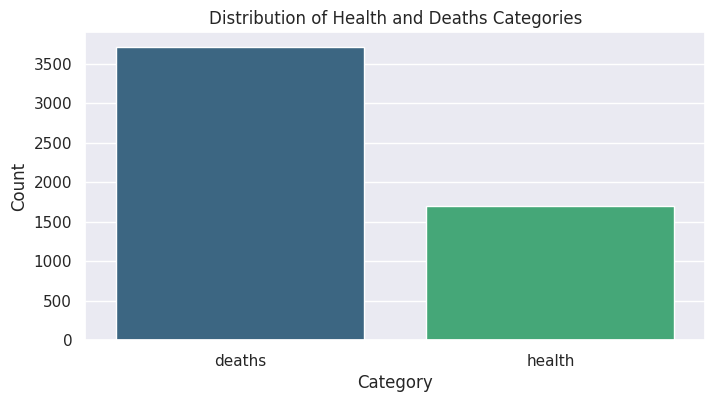

In [21]:
# Distribution of 'gho_category'
plt.figure(figsize=(8, 4))
sns.countplot(x='gho_category', data=df1, palette='viridis')
plt.title("Distribution of Health and Deaths Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

<ipython-input-24-40ab29a9b10f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df1['value'], bins=30, kde=True, palette='viridis')


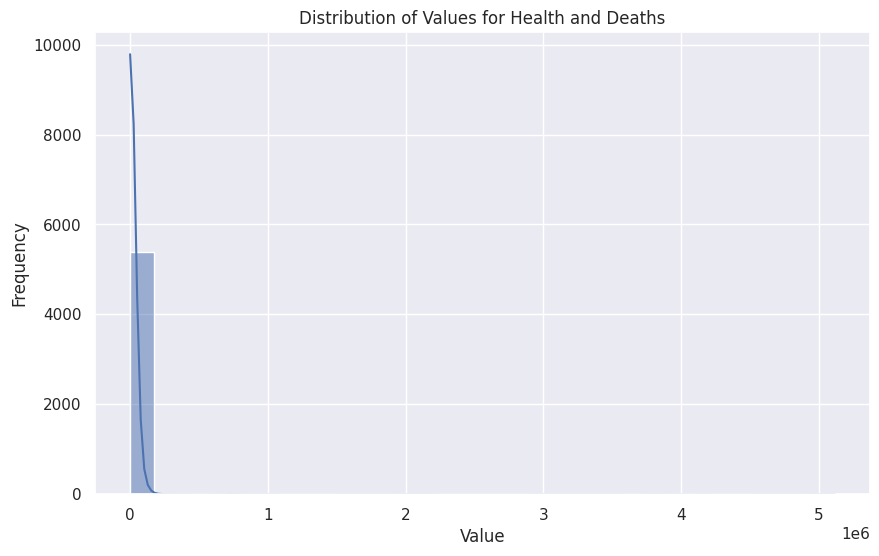

In [24]:
# Distribution of 'value'
plt.figure(figsize=(10, 6))
sns.histplot(df1['value'], bins=30, kde=True, palette='viridis')
plt.title("Distribution of Values for Health and Deaths")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

<ipython-input-25-bbd2800fc3d2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='year', y='value', hue='gho_category', estimator='mean', ci=None, palette='viridis')


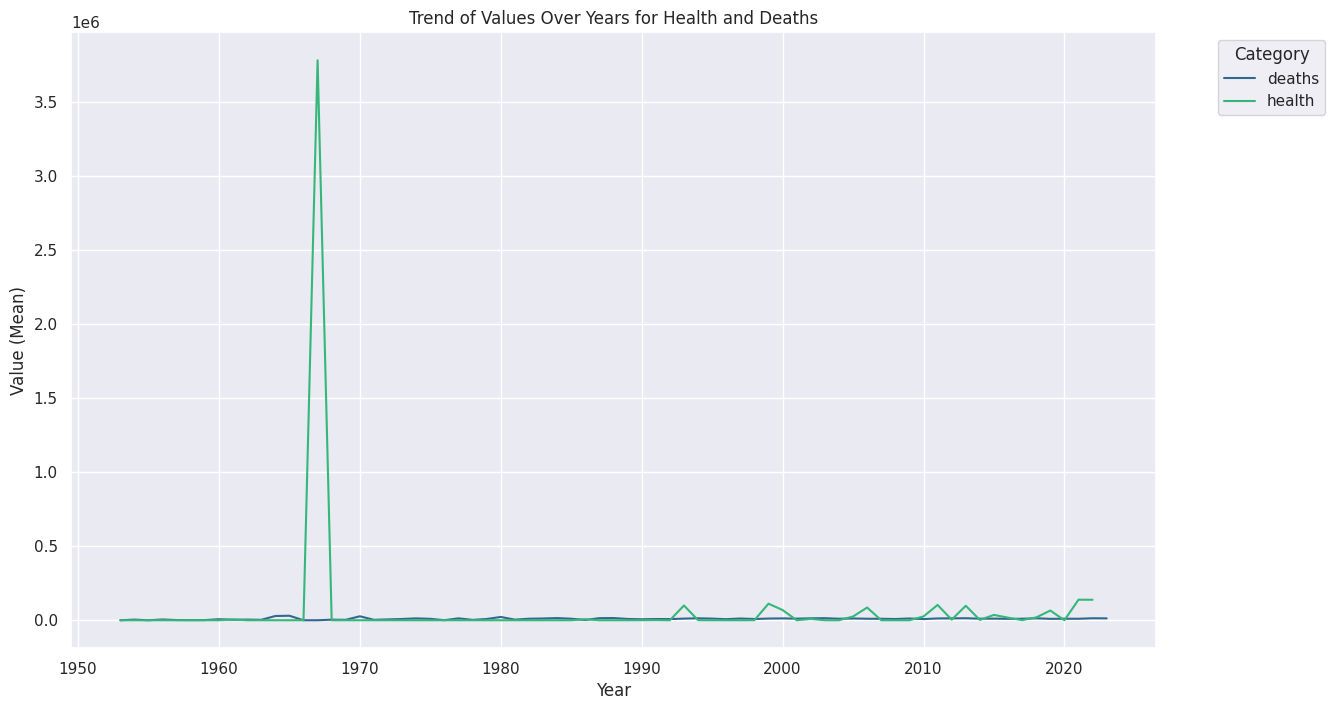

In [25]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='year', y='value', hue='gho_category', estimator='mean', ci=None, palette='viridis')
plt.title("Trend of Values Over Years for Health and Deaths")
plt.xlabel("Year")
plt.ylabel("Value (Mean)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

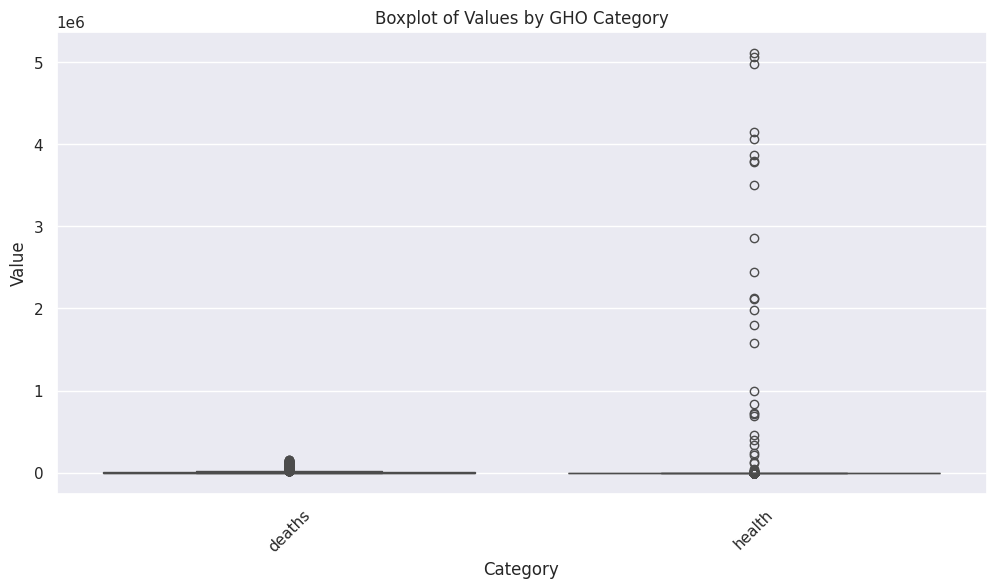

In [27]:
# Boxplot of Values by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='gho_category', y='value', data=df1)
plt.title("Boxplot of Values by GHO Category")
plt.xlabel("Category")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-a5301a1ee653>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gho_category',y='year', data=df1, palette='viridis')


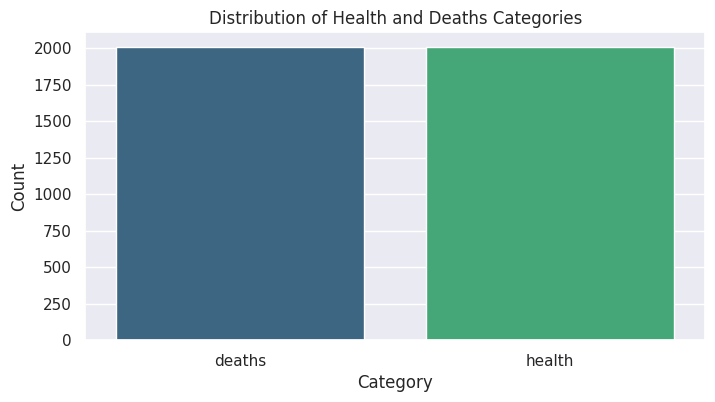

In [30]:

plt.figure(figsize=(8, 4))
sns.barplot(x='gho_category',y='year', data=df1, palette='viridis')
plt.title("Distribution of Health and Deaths Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

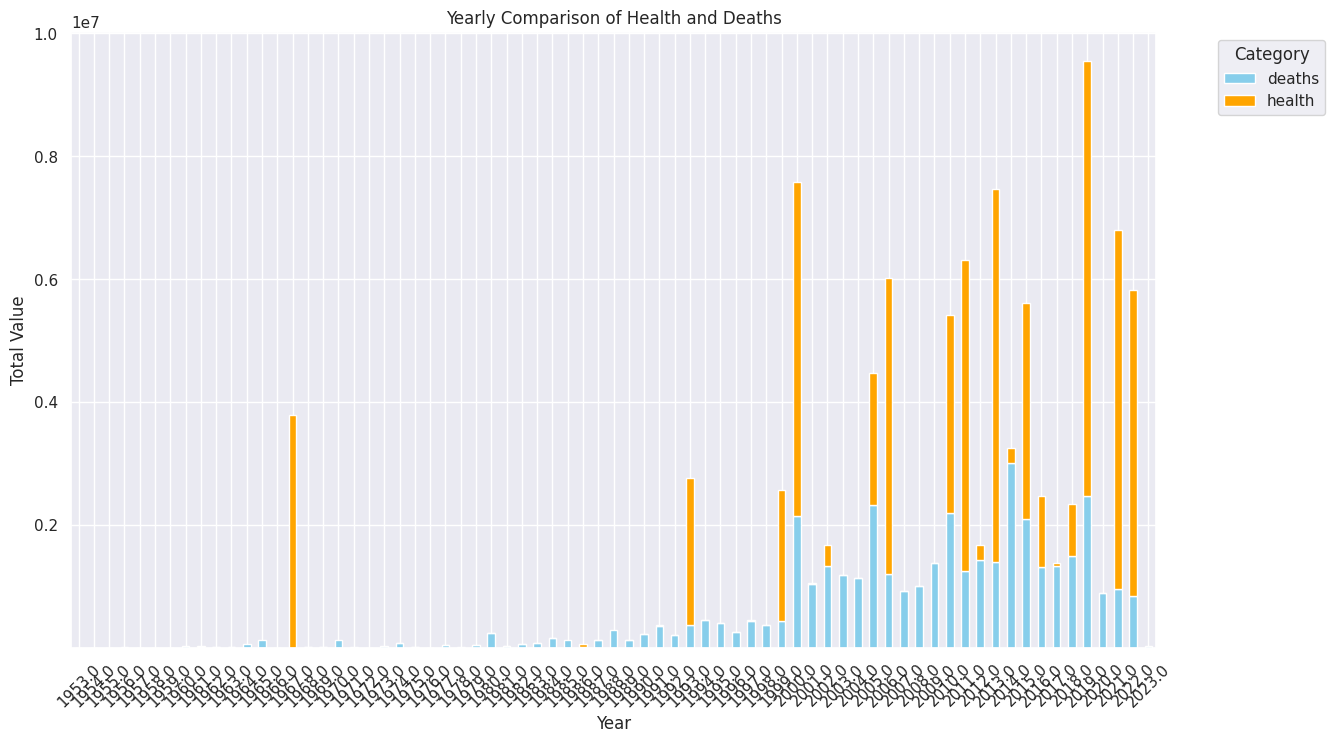

In [33]:
crosstab = pd.crosstab(df1['year'], df1['gho_category'], values=df1['value'], aggfunc='sum')
crosstab.plot(kind='bar', figsize=(14, 8), stacked=True, color=['skyblue', 'orange'])
plt.title("Yearly Comparison of Health and Deaths")
plt.xlabel("Year")
plt.ylabel("Total Value")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

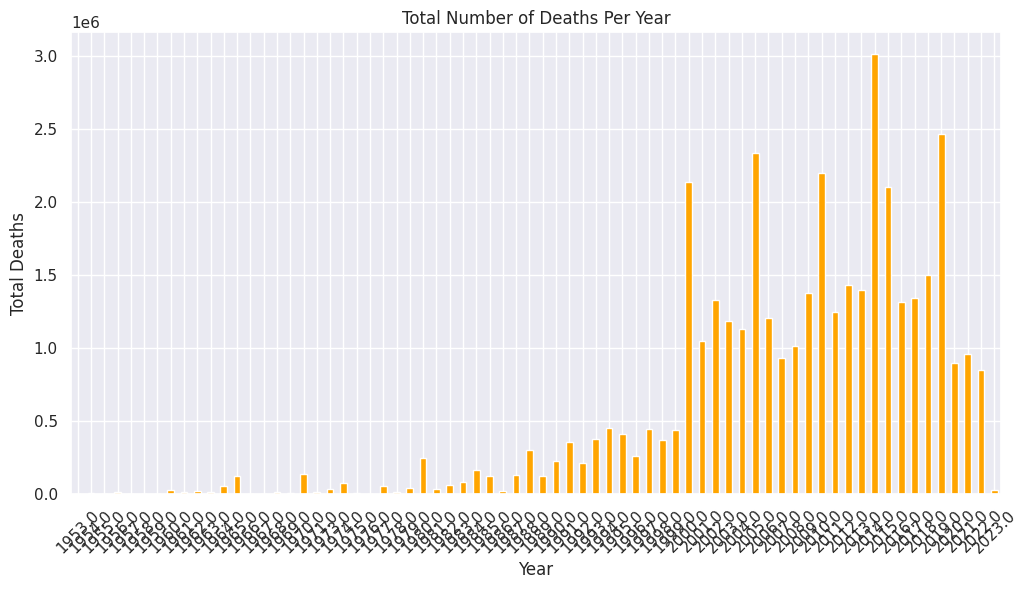

In [36]:
deaths_per_year = df1[df1['gho_category'] == 'deaths'].groupby('year')['value'].sum()
plt.figure(figsize=(12, 6))
deaths_per_year.plot(kind='bar', color='orange')
plt.title("Total Number of Deaths Per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.show()

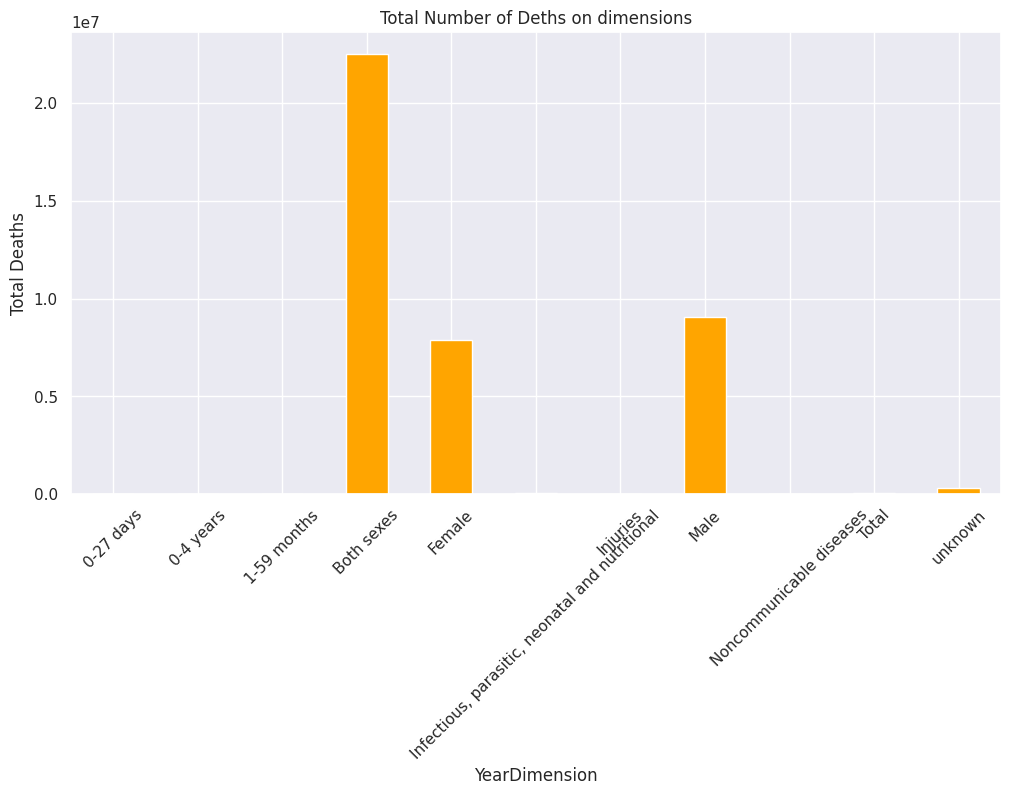

In [37]:
deaths_per_year = df1[df1['gho_category'] == 'deaths'].groupby('dimension')['value'].sum()
plt.figure(figsize=(12, 6))
deaths_per_year.plot(kind='bar', color='orange')
plt.title("Total Number of Deths on dimensions")
plt.xlabel("YearDimension")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.show()

In [38]:
pd.crosstab(df1['dimension'], df1['gho_category'], values=df1['value'], aggfunc='sum')

gho_category,deaths,health
dimension,,
0-27 days,597.491900,NaN
0-4 years,1446.166650,NaN
1-59 months,848.674840,NaN
60+ years,NaN,6.127000e+01
Addiction counsellors,NaN,0.000000e+00
...,...,...
Third main,NaN,0.000000e+00
Tobacco,NaN,0.000000e+00
Total,69369.342410,2.990600e+02


In [43]:
counts = df['dimension'].value_counts()
filtered_counts = counts[counts >= 10]
filtered_counts

,count
dimension,
Both sexes,3881
unknown,3438
Female,3024
Male,2892
Total,835
Rural,622
Urban,621
1-59 months,504
0-27 days,503


In [45]:
counts = df1['dimension'].value_counts()
filtered_counts = counts[counts >= 10]
filtered_counts

,count
dimension,
Both sexes,1725
unknown,1262
Male,722
Female,720
1-59 months,252
0-27 days,252
0-4 years,252
Total,27
Urban,24
